## Laboratorio de scikit-learn
Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba

In [40]:
# Importar módulos
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Semilla de los ultimos cuatros sigitos de mi matricula 8261

# Cargar datos
df = pd.read_csv('Valhalla23.csv')
celsius = df['Celsius']
valks = df['Valks']

Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

In [41]:
#  Divide el set de datos
df_train, df_temp = train_test_split(df, test_size=0.6, random_state=8015)
df_val, df_test = train_test_split(df_temp, test_size=1/3, random_state=8015)


# Escalar los datos
scaler = StandardScaler()
df_train[['Celsius']] = scaler.fit_transform(df_train[['Celsius']])
df_val[['Celsius']] = scaler.transform(df_val[['Celsius']])
df_test[['Celsius']] = scaler.transform(df_test[['Celsius']])


# Entrenar el modelo
# --- Crear objeto del modelo
modelo = lm.SGDRegressor(eta0=0.0004, max_iter= 30000, random_state=8261) # Se escojieron esos numero de iteraciones y de eta porque esran los que mejor le quedaban al modelo
# --- Usar método fit para ajustar el modelo a los datos de entrenamiento
modelo.fit(df_train[['Celsius']], df_train[['Valks']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0004, max_iter=30000, random_state=8261)

Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.

In [42]:
# Analizar desempeño test
scoreTest = modelo.score(df_test[['Celsius']], df_test[['Valks']])
prediccionesTest = modelo.predict(df_test[['Celsius']])
mseTest = mt.mean_squared_error(df_test[['Valks']], prediccionesTest)
print("Score test:", scoreTest, "\n")
print("Mean Squared Error test:", mseTest,"\n")

# Analizar desempeño train
scoreTrain = modelo.score(df_train[['Celsius']], df_train[['Valks']])
prediccionesTrain = modelo.predict(df_train[['Celsius']])
mseTrain = mt.mean_squared_error(df_train[['Valks']], prediccionesTrain)
print("Score train:", scoreTrain, "\n")
print("Mean Squared Error train:", mseTrain, "\n")

# Analizar desempeño validacion
scoreVal = modelo.score(df_val[['Celsius']], df_val[['Valks']])
prediccionesVal = modelo.predict(df_val[['Celsius']])
mseVal = mt.mean_squared_error(df_val[['Valks']], prediccionesVal)
print("Score validacion:", scoreVal, "\n")
print("Mean Squared Error validacion:", mseVal, "\n")

Score test: 0.9873634148879258 

Mean Squared Error test: 89.70074234653312 

Score train: 0.9956490335414906 

Mean Squared Error train: 33.24564287396184 

Score validacion: 0.994494197197073 

Mean Squared Error validacion: 42.21977371764266 



Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)


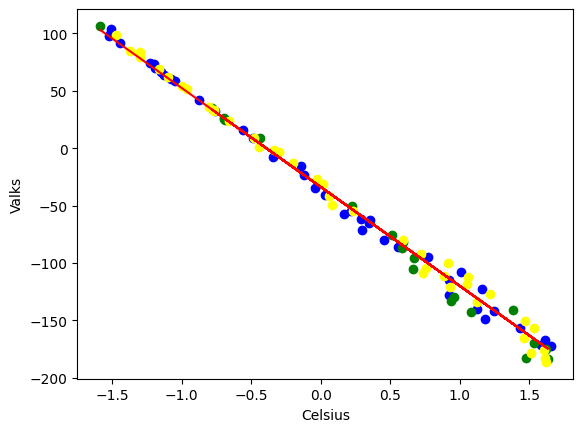

In [43]:
# Graficar los datos

#Train
plt.scatter(df_train['Celsius'], df_train['Valks'], color='blue')

#Test
plt.scatter(df_test['Celsius'], df_test['Valks'], color='green')

#Validacion
plt.scatter(df_val['Celsius'], df_val['Valks'], color='yellow')

# Linea de regresion
plt.plot(df_test['Celsius'], prediccionesTest, color='red')

# Etiquetas de los ejes
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.show()

Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento

Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación

Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento

In [44]:
# Generar una lista de 19 números únicos dentro del rango 3-39 y agregar el número 2 si no está presente
cantidades = random.sample(range(3, 40), 19)
if 2 not in cantidades:
    cantidades.append(2)
cantidades.sort()

# Inicializar listas para errores
mse_train_means = []
mse_val_means = []

# Calcular errores para cada tamaño de muestra
for cantidad in cantidades:
    errores_train = []
    errores_val = []
    for i in range(100):
        # Seleccionar un subconjunto aleatorio del set de entrenamiento
        df_subconjunto = df_train.sample(n=cantidad, random_state=i)
        # Entrenar un modelo con el subconjunto
        modelo = lm.SGDRegressor(eta0=0.0004, max_iter=1000, random_state=8261)
        modelo.fit(df_subconjunto[['Celsius']], df_subconjunto[['Valks']])
        # Calcular el error cuadrático medio en los sets de entrenamiento y validación
        predicciones_train = modelo.predict(df_train[['Celsius']])
        mse_train = mt.mean_squared_error(df_train[['Valks']], predicciones_train)
        predicciones_val = modelo.predict(df_val[['Celsius']])
        mse_val = mt.mean_squared_error(df_val[['Valks']], predicciones_val)
        errores_train.append(mse_train)
        errores_val.append(mse_val)
    # Guardar los resultados promediados para esta cantidad de muestras
    mse_train_means.append(np.mean(errores_train))
    mse_val_means.append(np.mean(errores_val))

# Calcular los errores de la línea base
media_valks_train = df_train['Valks'].mean()
media_valks_val = df_val['Valks'].mean()
predicciones_base_train = np.full(df_train[['Valks']].shape, media_valks_train)
predicciones_base_val = np.full(df_val[['Valks']].shape, media_valks_val)
mse_base_train = mt.mean_squared_error(df_train[['Valks']], predicciones_base_train)
mse_base_val = mt.mean_squared_error(df_val[['Valks']], predicciones_base_val)

# Agregar los errores de la línea base a las listas
mse_train_means.append(mse_base_train)
mse_val_means.append(mse_base_val)
cantidades.append('Línea Base')

# Mostrar los resultados
print("Errores promedio en entrenamiento:", mse_train_means)
print("Errores promedio en validación:", mse_val_means)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

Errores promedio en entrenamiento: [6548.339348213385, 6015.693990568622, 5133.960236983936, 4758.046804976409, 4293.110905040597, 3010.359597679523, 2809.1015361342065, 2232.057702147078, 2073.0817514018245, 1932.205948464244, 1785.379384479388, 1672.1479238549523, 1464.2966898703585, 1379.6530233146827, 1297.9997450921855, 1220.9848265309727, 1148.2272008123275, 781.7360526584711, 731.1055399830437, 604.3063074624979, 7640.978893078243]
Errores promedio en validación: [7368.25610425522, 6763.078707579262, 5771.631133460289, 5347.645577891675, 4825.583894445353, 3369.4828915756107, 3142.814171995231, 2497.7201094392944, 2316.519633573386, 2156.823196666106, 1989.5957863323035, 1863.9853115407761, 1634.408370666213, 1540.1353634182587, 1449.5477505315837, 1363.55170150043, 1282.6192147275472, 871.7504669568699, 814.5159280955228, 672.6666775685293, 7668.2320869171]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/loc

Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base

Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento


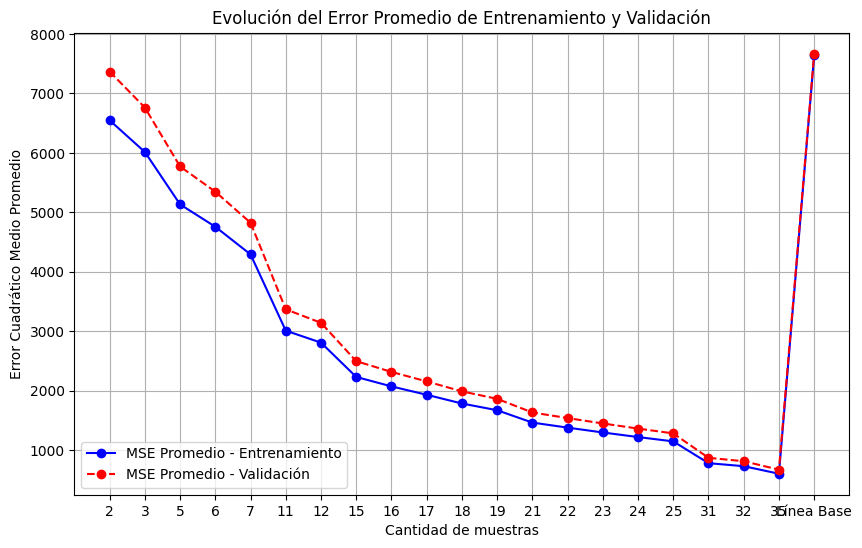

In [45]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(cantidades, mse_train_means, marker='o', linestyle='-', color='b', label='MSE Promedio - Entrenamiento')
plt.plot(cantidades, mse_val_means, marker='o', linestyle='--', color='r', label='MSE Promedio - Validación')
plt.xlabel('Cantidad de muestras')
plt.ylabel('Error Cuadrático Medio Promedio')
plt.title('Evolución del Error Promedio de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()

Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

## Gracias a la grafica podemos observar que que entre más muestras se usen tanto en los datos de entrenamiento al igual que en los dattos de validacion estas van a ir reducciendo su error

Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.


## En base a la grafica anterior se tomo la decision de usar las muestras de 36 a 37 ya que estas en ambos sets de datos no se nota un error tan grande

Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [46]:
from sklearn.linear_model import SGDRegressor


# Seleccionar un subconjunto aleatorio del set de entrenamiento con 100 muestras
df_subconjunto = df_train.sample(n=36, random_state=8261)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_subconjunto[['Celsius']])
X_val_scaled = scaler.transform(df_val[['Celsius']])
X_test_scaled = scaler.transform(df_test[['Celsius']])

# Entrenar un nuevo modelo con el subconjunto
modelo_final = SGDRegressor(eta0=0.004, max_iter=30000, random_state=8261)  # Ajuste de eta0
modelo_final.fit(X_train_scaled, df_subconjunto[['Valks']])

# Calcular el error cuadrático medio en los sets de entrenamiento, validación y prueba
predicciones_train = modelo_final.predict(X_train_scaled)
mse_train_final = mean_squared_error(df_subconjunto[['Valks']], predicciones_train)

predicciones_val = modelo_final.predict(X_val_scaled)
mse_val_final = mean_squared_error(df_val[['Valks']], predicciones_val)

predicciones_test = modelo_final.predict(X_test_scaled)
mse_test_final = mean_squared_error(df_test[['Valks']], predicciones_test)

# Mostrar los resultados
print("Error cuadrático medio en entrenamiento (36 muestras):", mse_train_final)
print("Error cuadrático medio en validación (36 muestras):", mse_val_final)
print("Error cuadrático medio en prueba (36 muestras):", mse_test_final)


Error cuadrático medio en entrenamiento (36 muestras): 23.017897341564776
Error cuadrático medio en validación (36 muestras): 44.76944038358751
Error cuadrático medio en prueba (36 muestras): 69.32059748223195


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)

Argumenta cuál configuración funcionó mejor, y por qué

##Una vez realizando la comparacion se puede notar que hubo una gran mejoria con los datos de prueba, en cambio en los datos de validacion y entrenamiento y validacion no hubo un cambio tan notable. Ante lo visto se puede indicar que el mejor modelo fue el de 36 muestras, ya que tiene menos error que el otro. Por lo que podemos decir que tiene una ventaja contra el otro modelo.  


In [47]:
# Codigo para pasar el notebook a html
import os
from google.colab import drive
drive.mount('/content/drive')
# Listar archivos en el directorio MyDrive/Tarea
os.listdir('/content/drive/MyDrive/Tarea')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Challenge.html',
 'Challenge.gdoc',
 'Challenge2Framework.html',
 'Challenge2Framework.ipynb',
 'Challenge2Framework.gdoc',
 'Challenge.ipynb',
 'LaboratorioFramework.ipynb',
 'LaboratorioFramework.html']

In [48]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Tarea/LaboratorioFramework.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Tarea/LaboratorioFramework.ipynb to html
[NbConvertApp] Writing 813679 bytes to /content/drive/MyDrive/Tarea/LaboratorioFramework.html
